# AUTHORS

- **Mathieu Breier**  
  *BSE DSDM 2023-2024*  
  Email: [mathieu.breier@bse.eu](mailto:mathieu.breier@bse.eu)

- **Guillem Mirabent**  
  *BSE DSDM 2023-2024*  
  Email: [guillem.mirabent@bse.eu](mailto:guillem.mirabent@bse.eu)

# INDEX

# LOAD & IMPORTS

In [916]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.utils import class_weight

from utils_preproc import *

import klib as kl 
import plotly.express as px

import seaborn as sns

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import keras
import tensorflow as tf
from tensorflow.python.keras.layers import Dense
from keras import ops
from keras import layers, Model, regularizers, activations
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

import gensim.downloader as api
from gensim.models import KeyedVectors, Word2Vec
import gensim

from tqdm import tqdm
from googletrans import Translator
import time

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mathieu26/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [917]:
data = pd.read_csv('../Spanish_Parliament_Speeches.csv')
data = kl.clean_column_names(data)
display(data)

,text_id,id,title,date,body,term,session,meeting,sitting,agenda,...,party_status,party_orientation,speaker_id,speaker_name,speaker_gender,speaker_birth,is_in_english,key,speech_text,speech_text_preprocessed
0,ParlaMint-ES_2022-06-29-CD220629,ParlaMint-ES_2022-06-29-CD220629.u3,Sesión plenaria núm. 191 (2022-06-29),2022-06-29,Cámara Baja,Legislatura XIV,Sesión plenaria núm. 191,-,2022-06-29,-,...,Opposition,Centro-derecha - Derecha,JaimeDeOlanoVela,"De Olano Vela, Jaime",M,1970,False,ParlaMint-ES_2022-06-29-CD220629.u3,"Gracias, presidenta. Señora Calviño, los dos ú...",gracias presidenta señora calviño dos último d...
1,ParlaMint-ES_2022-06-29-CD220629,ParlaMint-ES_2022-06-29-CD220629.u5,Sesión plenaria núm. 191 (2022-06-29),2022-06-29,Cámara Baja,Legislatura XIV,Sesión plenaria núm. 191,-,2022-06-29,-,...,Coalition,Centro-izquierda,NadiaCalviñoSantamaría,"Calviño Santamaría, Nadia",F,1968,False,ParlaMint-ES_2022-06-29-CD220629.u5,"Gracias, presidenta. Voy a responder a la preg...",gracias presidenta ir responder pregunta tener...
2,ParlaMint-ES_2022-06-29-CD220629,ParlaMint-ES_2022-06-29-CD220629.u7,Sesión plenaria núm. 191 (2022-06-29),2022-06-29,Cámara Baja,Legislatura XIV,Sesión plenaria núm. 191,-,2022-06-29,-,...,Opposition,Centro-derecha - Derecha,JaimeDeOlanoVela,"De Olano Vela, Jaime",M,1970,False,ParlaMint-ES_2022-06-29-CD220629.u7,"Señora Calviño, menos mal que funcionan sus me...",señora calviño menos mal funcionar medida infl...
3,ParlaMint-ES_2022-06-29-CD220629,ParlaMint-ES_2022-06-29-CD220629.u9,Sesión plenaria núm. 191 (2022-06-29),2022-06-29,Cámara Baja,Legislatura XIV,Sesión plenaria núm. 191,-,2022-06-29,-,...,Coalition,Centro-izquierda,NadiaCalviñoSantamaría,"Calviño Santamaría, Nadia",F,1968,False,ParlaMint-ES_2022-06-29-CD220629.u9,"Muchas gracias. Ya es mala suerte, señor Olano...",gracia ser malo suerte señor olano poner usted...
4,ParlaMint-ES_2022-06-29-CD220629,ParlaMint-ES_2022-06-29-CD220629.u12,Sesión plenaria núm. 191 (2022-06-29),2022-06-29,Cámara Baja,Legislatura XIV,Sesión plenaria núm. 191,-,2022-06-29,-,...,Opposition,Derecha - Extrema derecha,IvánEspinosaDeLosMonterosDeSimón,"Espinosa De Los Monteros De Simón, Iván",M,1971,False,ParlaMint-ES_2022-06-29-CD220629.u12,"Gracias, señora presidenta. Señora vicepreside...",gracias señora presidenta señora vicepresident...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32546,ParlaMint-ES_2016-11-15-CD161115,ParlaMint-ES_2016-11-15-CD161115.u120,Sesión plenaria núm. 14 (2016-11-15),2016-11-15,Cámara Baja,Legislatura XII,Sesión plenaria núm. 14,-,2016-11-15,-,...,Opposition,Centro-izquierda - izquierda,GabrielRufiánRomero,"Rufián Romero, Gabriel",M,1982,False,ParlaMint-ES_2016-11-15-CD161115.u120,"Señora presidenta, por alusiones, quería conte...",señora presidentar alusión querer contestar se...
32547,ParlaMint-ES_2016-11-15-CD161115,ParlaMint-ES_2016-11-15-CD161115.u122,Sesión plenaria núm. 14 (2016-11-15),2016-11-15,Cámara Baja,Legislatura XII,Sesión plenaria núm. 14,-,2016-11-15,-,...,Opposition,Centro-izquierda - izquierda,GabrielRufiánRomero,"Rufián Romero, Gabriel",M,1982,False,ParlaMint-ES_2016-11-15-CD161115.u122,Es la falsedad que ha comentado el portavoz de...,ser falsedad haber comentar portavoz grupo soc...
32548,ParlaMint-ES_2016-11-15-CD161115,ParlaMint-ES_2016-11-15-CD161115.u124,Sesión plenaria núm. 14 (2016-11-15),2016-11-15,Cámara Baja,Legislatura XII,Sesión plenaria núm. 14,-,2016-11-15,-,...,Opposition,Centro-izquierda,MiguelÁngelHerediaDíaz,"Heredia Díaz, Miguel Ángel",M,1966,False,ParlaMint-ES_2016-11-15-CD161115.u124,"Señora presidenta, tengo un vídeo donde el señ...",señora presidenta tener vídeo señor rufián cua...
32549,ParlaMint-ES_2016-11-15-CD161115,ParlaMint-ES_2016-11-15-CD161115.u126,Sesión plenaria núm. 14 (2016-11-15),2016-11-15,Cámara Baja,Legislatura XII,Sesión plenaria núm. 14,-,2016-11-15,-,...,Opposition,Centro-izquierda,MiguelÁngelHerediaDíaz,"Heredia Díaz, Miguel Ánge

# DATA PREPARATION

In [918]:
sel_cols = ['date', 'party_status', 'speaker_party', 'speaker_gender', 'speaker_id', 'speaker_name', 'speaker_birth', 'term', 'speech_text_preprocessed']

data = data[sel_cols]

In [919]:
power_definer(data)

In [920]:
data.loc[data['speaker_id'] == 'CarmenRiobolosRegadera', 'speaker_id'] = 'CarmenRiolobosRegadera'

In [921]:
list_of_interest_parties = ['PP', 'PSOE', 'UP', 'Vox', 'ERC-S', 'JxCat-Junts', 'EAJ-PNV', 'EH Bildu', 'CiU', 'ERC-CATSÍ']

data = data[data['speaker_party'].isin(list_of_interest_parties)]

display(data[['speaker_name', 'speaker_party']].head())

,speaker_name,speaker_party
0,"De Olano Vela, Jaime",PP
1,"Calviño Santamaría, Nadia",PSOE
2,"De Olano Vela, Jaime",PP
3,"Calviño Santamaría, Nadia",PSOE
4,"Espinosa De Los Monteros De Simón, Iván",Vox


In [922]:
age_dict = {
    'JuanLuisSotoBurillo': 1978,
    'JoséCarlosDuránPeralta': 1987,
    'JoséCarlosDíazRodríguez': 1967,
    'CarmenRiolobosRegadera': 1953,
    'MaríaDelMarArnaizGarcía': 1966,
    'JoséIgnacioWertOrtega': 1950,
    'JoséManuelGarcíaMargalloyMarfil': 1944,
    'JulioVillarrubiaMediavilla': 1957,
    'EmilioBarbónMartínez': 1930,
    'CarmenCastellanoiFernández': 1959
}

# map speaker to age 
data.loc[data['speaker_birth'] == '-', 'speaker_birth'] = data.loc[data['speaker_birth'] == '-', 'speaker_id'].map(age_dict)
print(data['speaker_birth'].unique())

data[data['speaker_birth'] == '-']

['1970' '1968' '1971' '1972' '1967' '1966' '1988' '1959' '1962' '1979'
 '1976' '1957' '1978' '1965' '1977' '1985' '1975' '1949' '1969' 1978
 '1973' '1951' '1980' '1964' '1989' '1958' '1974' '1982' '1996' '1961'
 '1952' 1987 '1954' '1981' '1984' '1956' '1963' '1960' '1990' '1983'
 '1986' '1993' '1947' '1991' 1967 '1992' '1987' '1955' '1953' 1953 1966
 '1948' '1944' '1950' '1937' 1950 '1945' 1944 1957 1930 1959 '1946' '1943']


,date,speaker_party,speaker_gender,speaker_id,speaker_name,speaker_birth,term,speech_text_preprocessed,party_in_power


In [923]:
data['speaker_birth'] = data['speaker_birth'].astype(int)
age_getter(data)

In [924]:
print(data.speaker_gender.unique())

display(data[data['speaker_gender'] == 'U'])
data.loc[data.speaker_gender == 'U', 'speaker_gender'] = 'F'
print(data.speaker_gender.unique())

gender_map = {
    'M': 1,
    'F': 0
}

data['speaker_gender'] = data['speaker_gender'].map(gender_map)

['M' 'F' 'U']


,date,speaker_party,speaker_gender,speaker_id,speaker_name,term,speech_text_preprocessed,party_in_power,speaker_age
2762,2022-11-23,PP,U,CarmenRiolobosRegadera,"Riolobos Regadera, Carmen",Legislatura XIV,gracias señor presidente señorías señor garzón...,0,69
2909,2022-02-24,PP,U,CarmenRiolobosRegadera,"Riolobos Regadera, Carmen",Legislatura XIV,gracias señora presidenta señor garzón alegrar...,0,69
2910,2022-02-24,PP,U,CarmenRiolobosRegadera,"Riolobos Regadera, Carmen",Legislatura XIV,estarer pendiente consumidor ser importante bu...,0,69
4676,2022-02-01,PP,U,CarmenRiolobosRegadera,"Riolobos Regadera, Carmen",Legislatura XIV,gracias señor presidente sánchez cesar garzón ...,0,69
4692,2022-02-01,PP,U,CarmenRiolobosRegadera,"Riolobos Regadera, Carmen",Legislatura XIV,NaN,0,69
15223,2021-03-11,PP,U,CarmenRiolobosRegadera,"Riolobos Regadera, Carmen",Legislatura XIV,gracia señora presidenta buen día señoría defi...,0,68
17939,2021-12-02,PP,U,CarmenRiolobosRegadera,"Riolobos Regadera, Carmen",Legislatura XIV,gracias señor presidente señorías señor minist...,0,68
20188,2021-11-24,PP,U,CarmenRiolobosRegadera,"Riolobos Regadera, Carmen",Legislatura XIV,gracias señor presidente señorías señor garzón...,0,68
20317,2021-09-29,PP,U,CarmenRiolobosRegadera,"Riolobos Regadera, Carmen",Legislatura XIV,señor garzón irrelevancia gobierno ser directa...,0,68
20319,2021-09-29,PP,U,CarmenRiolobosRegadera,"Riolobos Regadera, Carmen",Legislatura XIV,ideología traer pobreza subida energía haber p...,0,68


['M' 'F']


In [925]:
print(data.term.unique())

# label encode term columns 
print(data.term.unique())

term_map = {
    'Legislatura X': 0,
    'Legislatura XI': 1,
    'Legislatura XII': 2,
    'Legislatura XIII': 3,
    'Legislatura XIV': 4
}

data['term'] = data['term'].map(term_map)

print(data.term.unique())

['Legislatura XIV' 'Legislatura X' 'Legislatura XII' 'Legislatura XIII'
 'Legislatura XI']
['Legislatura XIV' 'Legislatura X' 'Legislatura XII' 'Legislatura XIII'
 'Legislatura XI']
[4 0 2 3 1]


In [926]:
data.dropna(subset=['speech_text_preprocessed'], inplace=True)

In [927]:
data.shape

(22489, 9)

In [928]:
data = data.drop_duplicates(subset=['speech_text_preprocessed'])

In [929]:
data.shape

(22251, 9)

## DATA AUGMENTATION
### BACK TRANSLATION

(Can be deactivated by commenting this line of code below: data = df_combined)

In [930]:
# Initialize the translator
translator = Translator()

# Back translation function
def back_translate(text, src='es', intermediate='en'):
    try:
        # Translate to intermediate language
        translated = translator.translate(text, src=src, dest=intermediate).text
        # Translate back to the original language
        back_translated = translator.translate(translated, src=intermediate, dest=src).text
        return back_translated
    except Exception as e:
        print(f"Error during translation: {e}")
        return text  # Return the original text if there's an error
    
# Back translation function with character limit check
def back_translate(text, src='es', intermediate='en', CHAR_LIMIT= 5000 ):
    try:
        # Check if the text exceeds the character limit
        if len(text) > CHAR_LIMIT:
            print(f"Text exceeds {CHAR_LIMIT} characters. Returning original text.")
            return text
        
        # Translate to intermediate language
        translated = translator.translate(text, src=src, dest=intermediate).text
        # Translate back to the original language
        back_translated = translator.translate(translated, src=intermediate, dest=src).text
        return back_translated
    
    except Exception as e:
        print(f"Error during translation: {e}")
        return text  # Return the original text if there's an error


In [931]:
"""
Code to augment the data using back translation. 
We decide to keep the same features and label value of the original speech for the respective augmented speech.
"""

# Extract the speech texts and other features
speeches = data['speech_text_preprocessed'].tolist()
other_features = data.drop(columns=['speech_text_preprocessed'])  # Drop text column to get other features

# Define the number of rows to augment
num_rows_to_augment = 100  # Change this to the number of rows you want to augment

# Ensure num_rows_to_augment does not exceed the dataset size
num_rows_to_augment = min(num_rows_to_augment, len(speeches))

# Augment the speeches using back translation and create corresponding rows
augmented_speeches = []
augmented_features = []

# Use tqdm to create a progress bar
for i in tqdm(range(num_rows_to_augment), desc="Augmenting speeches"):
    speech = speeches[i]
    back_translated_speech = back_translate(speech)
    augmented_speeches.append(back_translated_speech)
    augmented_features.append(other_features.iloc[i])
    time.sleep(1)  # Add delay to avoid rate limiting issues with the translator API

# Create a new DataFrame for augmented data
df_augmented = pd.DataFrame(augmented_features)
df_augmented['speech_text_preprocessed'] = augmented_speeches

# Combine original and augmented data
df_combined = pd.concat([data, df_augmented], ignore_index=True)

Augmenting speeches:  50%|█████     | 50/100 [01:15<01:11,  1.42s/it]

Text exceeds 5000 characters. Returning original text.


Augmenting speeches:  54%|█████▍    | 54/100 [01:21<01:02,  1.35s/it]

Text exceeds 5000 characters. Returning original text.


Augmenting speeches:  63%|██████▎   | 63/100 [01:36<01:02,  1.68s/it]

Text exceeds 5000 characters. Returning original text.


Augmenting speeches: 100%|██████████| 100/100 [02:35<00:00,  1.55s/it]


In [998]:
df_combined.shape

(22348, 11)

In [999]:
"""
We remove the duplicated speeches that could not be translated and were simply returned as the original text.
"""

df_combined = df_combined.drop_duplicates(subset=['speech_text_preprocessed'])

In [1000]:
df_combined.shape

(22348, 11)

In [1001]:
"""
We print one original and back-translated text to verify the accuracy and coherence of the back translation.
"""

# Extract the speech texts
speeches = data['speech_text_preprocessed'].tolist()

# Apply back translation to one sample
original_speech = speeches[26]
back_translated_speech = back_translate(original_speech)

# Display the original and back-translated texts
print(f"Original Text: {original_speech}")
print(f"Back Translated Text: {back_translated_speech}\n")

Original Text: gracias presidente ministra haber ser usted incapaz censurar grave insulto proferido grupo compañera gobierno irene montero tratar comentario hecho calor debate parlamentario ser gravísimo afrenta queexigirer responsabilidad entristecir cobardía señora ministra aplauso hora calificar insulto mentira hoy haber sufrir irene montero haber pasar hoy supuesto víctima violencia político ser pretender pleno semana pasado agresor parecer usted aplausos hacer día decir metro autobús oía hablar usted reforma consejo general poder judicial ahora existir verdadero alarma social excarcelación serie delincuente sexual haber decir usted ser escuchar autobús seguir usted escuchar preocupación español tema realmente afectar aplausos respecto pregunta haber formular ley salvo mantra repetir miembro gobierno bancada socialista ser buen ley realmente usted haber decir embargo haber dedicar buen parte intervención acusar partido popular hacer menos ministra espalda recaar responsabilidad sal

In [1002]:
"""
Renaming the df_combined dataset with the augmented data to "data" for simplicity

!!! To use the data augmented set, uncomment the line below. !!!

"""

data = df_combined

In [1003]:
data['speech_text_preprocessed_tokenized'] = data['speech_text_preprocessed'].str.split()

In [1004]:
"""
Without taking those giveaways out, the model is performing at over 90% ROC AUC scores for the
PSOE-PP test set. This is good for this specific model, but it sacrifices a little bit of 
performance with regards to the Podemos-Vox test set.
"""

giveaways = ['pedro', 'sánchez', 'pablo', 'casado', 'mariano', 'rajoy', 'santiago', 'abascal', 
                'cristóbal', 'montoro', 'psoe', 'socialista', 'podemos', 'maría', 'montero', 'bildu', 
                'partido', 'popular', 'pp', 'mariano', 'rajoy', 'comú', 'podem', 'junts', 'per', 'vox',
                'vasco', 'pnv', 'simón', 'feijóo', 'aznar', 'arrimadas', 'illa', 'iglesias',
                'salvador', 'calviño', 'ábalos', 'robles', 'zapatero', 'marlaska', 'espinosa',
                'señora', 'señor', 'ministra', 'ministro', 'presidente', 'presidenta', 'gobierno', 
                'ser', 'haber', 'hacer', 'francina', 'armengol', 'decir', 'gracias', 'usted',
                'meritxell', 'batet', 'ana', 'pastor', 'patxi', 'lópez', 'jesús', 'posada']


spanish_stop_words = set(stopwords.words('spanish'))

# Combine the NLTK and custom stop words
custom_stopwords = spanish_stop_words.union(giveaways)

words_relevant = ['no', 'sí', 'bien', 'mal', 'me', 'mí']
for word in words_relevant:
    custom_stopwords.discard(word)

"""
If you want to run the model without those stopwords, just uncomment the line below.
"""
# custom_stopwords = spanish_stop_words
data['speech_text_preprocessed_tokenized'] = [remove_stopwords(speech, custom_stopwords) for speech in data['speech_text_preprocessed_tokenized']]

Minimum Length of the speech text to consider
+ Trying different values might lead to improved accuracy

In [1005]:
# cut off len of speech text > 100 

min_len = 300 #300 (best score so far)

print(data.shape)
data = brickwall_limiter(data, 'speech_text_preprocessed_tokenized', min_len)
print(data.shape)

(22348, 11)
(7688, 11)


Maximum Length of the speech text to consider (text above the limit is included into another speech text)
+ Trying different values might lead to improved accuracy

In [1006]:
maxlen = 500 # 500 (best score so far)

print(data.shape)
data = limit_splitter(data, maxlen)
print(data.shape)

(7688, 11)
(11934, 11)


In [1007]:
data = brickwall_limiter(data, 'speech_text_preprocessed_tokenized', min_len)
print(data.shape)

(9482, 11)


In [1008]:
display(data)

,date,speaker_party,speaker_gender,speaker_id,speaker_name,term,speech_text_preprocessed,party_in_power,speaker_age,speech_text_preprocessed_tokenized,speech_text_preprocessed_len
0,2022-06-29,ERC-S,1,JoanMargallSastre,"Margall Sastre, Joan",4,gracias presidenta bon día diputades i diputat...,0,47,"[bon, día, diputades, i, diputats, bon, día, d...",500
2,2022-06-29,ERC-S,1,JoanMargallSastre,"Margall Sastre, Joan",4,gràcies presidenta ministro usted haber hacer ...,0,47,"[gràcies, resumen, exhaustivo, cuota, lingüíst...",303
3,2022-06-29,PP,0,MaríaElviraRodríguezHerrer,"Rodríguez Herrer, María Elvira",4,gracias presidente ministra señoría ayer entra...,0,73,"[señoría, ayer, entrar, tarde, conocíamos, ir,...",500
4,2022-06-29,PP,0,MaríaElviraRodríguezHerrer,"Rodríguez Herrer, María Elvira",4,gracias presidente ministra señoría ayer entra...,0,73,"[presentación, comisión, mixto, pasado, día, 9...",421
5,2022-06-29,PSOE,0,MaríaJesúsMonteroCuadrado,"Montero Cuadrado, María Jesús",4,gracia señor presidente señoer efectivamente c...,1,56,"[gracia, señoer, efectivamente, creer, rodrígu...",500
...,...,...,...,...,...,...,...,...,...,...,...
11927,2016-11-15,PP,0,MaríaSandraMoneoDíez,"Moneo Díez, María Sandra",2,gracias señora presidenta señorías elección pa...,1,47,"[señorías, elección, pasado, mes, diciembre, a...",500
11929,2016-11-15,PP,0,MartaGonzálezVázquez,"González Vázquez, Marta",2,gracia presidenta señorías mujer querer comenz...,1,51,"[gracia, señorías, mujer, querer, comenzar, nu...",500
11931,2016-11-15,ERC-CATSÍ,0,TeresaJordàiRoura,"Jordà i Roura, Teresa",2,molt bona tardar tot i tot grupo parlamentario...,0,44,"[molt, bona, tardar, tot, i, tot, grupo, parla...",328
11932,2016-11-15,PP,1,JaimeEduardoDeOlanoVela,"Olano Vela, Jaime Eduardo De",2,gracias señora presidenta debatimos hoy confor...,1,46,"[debatimos, hoy, conformidad, dispuesto, artíc...",402


In [1009]:
# embeddings_file = '../embeddings-l-model.vec'
# wordvecs = KeyedVectors.load_word2vec_format(embeddings_file)

In [1010]:
# wordvecs_file = '../SBW-vectors-300-min5.bin'
# wordvecs2 = KeyedVectors.load_word2vec_format(wordvecs_file, binary=True)

In [1011]:
data['speech_text_preprocessed_tokenized'] = data['speech_text_preprocessed_tokenized'].apply(lambda x: ' '.join(x))
# display(data)

In [1012]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['speech_text_preprocessed_tokenized'])
data['speech_text_preprocessed_tokenized'] = tokenizer.texts_to_sequences(data['speech_text_preprocessed_tokenized'])
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

# seqs_padded = pad_sequences(seqs, maxlen=maxlen, padding='pre')
# print(seqs_padded)

63266


In [1013]:
# data['speech_text_preprocessed_tokenized'] = [seq for seq in seqs_padded]
display(data)

,date,speaker_party,speaker_gender,speaker_id,speaker_name,term,speech_text_preprocessed,party_in_power,speaker_age,speech_text_preprocessed_tokenized,speech_text_preprocessed_len
0,2022-06-29,ERC-S,1,JoanMargallSastre,"Margall Sastre, Joan",4,gracias presidenta bon día diputades i diputat...,0,47,"[3858, 33, 5571, 571, 3973, 3858, 33, 4283, 70...",500
2,2022-06-29,ERC-S,1,JoanMargallSastre,"Margall Sastre, Joan",4,gràcies presidenta ministro usted haber hacer ...,0,47,"[2853, 2310, 4346, 1325, 2371, 3946, 4, 15, 21...",303
3,2022-06-29,PP,0,MaríaElviraRodríguezHerrer,"Rodríguez Herrer, María Elvira",4,gracias presidente ministra señoría ayer entra...,0,73,"[21, 465, 406, 282, 23755, 3, 66, 81, 995, 498...",500
4,2022-06-29,PP,0,MaríaElviraRodríguezHerrer,"Rodríguez Herrer, María Elvira",4,gracias presidente ministra señoría ayer entra...,0,73,"[1603, 119, 2709, 141, 33, 757, 995, 147, 273,...",421
5,2022-06-29,PSOE,0,MaríaJesúsMonteroCuadrado,"Montero Cuadrado, María Jesús",4,gracia señor presidente señoer efectivamente c...,1,56,"[107, 367, 602, 23, 1571, 31, 584, 13788, 62, ...",500
...,...,...,...,...,...,...,...,...,...,...,...
11927,2016-11-15,PP,0,MaríaSandraMoneoDíez,"Moneo Díez, María Sandra",2,gracias señora presidenta señorías elección pa...,1,47,"[55, 411, 141, 104, 719, 572, 42, 1357, 9, 101...",500
11929,2016-11-15,PP,0,MartaGonzálezVázquez,"González Vázquez, Marta",2,gracia presidenta señorías mujer querer comenz...,1,51,"[107, 55, 124, 8, 787, 42, 128, 1971, 1248, 13...",500
11931,2016-11-15,ERC-CATSÍ,0,TeresaJordàiRoura,"Jordà i Roura, Teresa",2,molt bona tardar tot i tot grupo parlamentario...,0,44,"[4321, 3018, 1754, 6190, 571, 6190, 12, 45, 31...",328
11932,2016-11-15,PP,1,JaimeEduardoDeOlanoVela,"Olano Vela, Jaime Eduardo De",2,gracias señora presidenta debatimos hoy confor...,1,46,"[1132, 13, 3212, 907, 122, 1270, 237, 292, 337...",402


In [1014]:
# embedding_dim = 300
# seqs_embed = np.zeros((seqs_padded.shape[0], maxlen, embedding_dim))

# for i, seq in enumerate(seqs_padded):
#     for j, idx in enumerate(seq):
#         if idx != 0:
#             word = tokenizer.index_word.get(idx)
#             if word in wordvecs:
#                 seqs_embed[i, j] = wordvecs[word]

# seqs_embed = seqs_embed.astype('float32')

# data['speech_text_w2v'] = [seq for seq in seqs_embed]
# display(data)

In [1015]:
# vocab = set([token for list in data['speech_text_preprocessed_tokenized'] for token in list])
# vocab_size = len(vocab) + 1

# print(vocab_size)

In [1016]:
# data['speech_text_w2v'] = encode_data(data['speech_text_preprocessed_tokenized'], wordvecs)

# display(data.head())
# print(data.loc[0, 'speech_text_preprocessed_tokenized'])
# print(data.loc[0, 'speech_text_w2v'])

# TRAIN-TEST SPLIT

In [1017]:
podemos_vox = ['UP', 'Vox']
erc_junts = ['ERC-S', 'JxCat-Junts', 'CiU', 'ERC-CATSÍ']
bildu_pnv = ['EAJ-PNV', 'EH Bildu']
psoe_pp = ['PP', 'PSOE']

data_pv = data[data['speaker_party'].isin(podemos_vox)].copy()
data_ej = data[data['speaker_party'].isin(erc_junts)].copy()
data_bp = data[data['speaker_party'].isin(bildu_pnv)].copy()
data = data[data['speaker_party'].isin(psoe_pp)].copy()

In [1018]:
data.loc[data['speaker_party'] == 'PSOE', 'speaker_party'] = 0
data.loc[data['speaker_party'] == 'PP', 'speaker_party'] = 1

data_pv.loc[data_pv['speaker_party'] == 'UP', 'speaker_party'] = 0
data_pv.loc[data_pv['speaker_party'] == 'Vox', 'speaker_party'] = 1

data_ej.loc[data_ej['speaker_party'] == 'ERC-S', 'speaker_party'] = 0
data_ej.loc[data_ej['speaker_party'] == 'JxCat-Junts', 'speaker_party'] = 1
data_ej.loc[data_ej['speaker_party'] == 'CiU', 'speaker_party'] = 1
data_ej.loc[data_ej['speaker_party'] == 'ERC-CATSÍ', 'speaker_party'] = 0

data_bp.loc[data_bp['speaker_party'] == 'EH Bildu', 'speaker_party'] = 0
data_bp.loc[data_bp['speaker_party'] == 'EAJ-PNV', 'speaker_party'] = 1

display(data[['speaker_name', 'speaker_party']].head())

,speaker_name,speaker_party
3,"Rodríguez Herrer, María Elvira",1
4,"Rodríguez Herrer, María Elvira",1
5,"Montero Cuadrado, María Jesús",0
7,"Rodríguez Herrer, María Elvira",1
8,"Montero Cuadrado, María Jesús",0


In [1019]:
print(data['speaker_party'].value_counts(), data_pv['speaker_party'].value_counts(), data_ej['speaker_party'].value_counts(), data_bp['speaker_party'].value_counts())

speaker_party
0    2626
1    2602
Name: count, dtype: int64 speaker_party
0    1034
1     916
Name: count, dtype: int64 speaker_party
0    639
1    374
Name: count, dtype: int64 speaker_party
1    966
0    325
Name: count, dtype: int64


In [1020]:
# Unique politicians and their party labels (assuming one politician belongs to only one party)
unique_politicians = data.groupby('speaker_id')['speaker_party'].first().reset_index()

# Splitting unique politicians into train and test to ensure no overlap
train_politicians, test_politicians = train_test_split(unique_politicians, stratify=unique_politicians['speaker_party'], test_size=0.1, random_state=168)

# Selecting rows for the train and test datasets based on the split politicians
train_df = data[data['speaker_id'].isin(train_politicians['speaker_id'])].copy()
test_df = data[data['speaker_id'].isin(test_politicians['speaker_id'])].copy()

In [1021]:
print(train_df.shape)
print(test_df.shape)

# get intersection of speaker id in train and test
train_speaker_ids = train_df['speaker_id'].unique()
test_speaker_ids = test_df['speaker_id'].unique()

intersection = list(set(train_speaker_ids) & set(test_speaker_ids))
print(intersection)

(4795, 11)
(433, 11)
[]


In [1022]:
# split is near 50% on the training dataset
print(train_df.speaker_party.value_counts())
print(test_df.speaker_party.value_counts())

speaker_party
1    2401
0    2394
Name: count, dtype: int64
speaker_party
0    232
1    201
Name: count, dtype: int64


In [1023]:
print(train_df['speaker_party'].values.dtype)

train_df['speaker_party'] = train_df['speaker_party'].astype(np.int64)
test_df['speaker_party'] = test_df['speaker_party'].astype(np.int64)
data_pv['speaker_party'] = data_pv['speaker_party'].astype(np.int64)
data_ej['speaker_party'] = data_ej['speaker_party'].astype(np.int64)
data_bp['speaker_party'] = data_bp['speaker_party'].astype(np.int64)

print(train_df['speaker_party'].values.dtype)

object
int64


In [1024]:
XTEMP = train_df['speech_text_preprocessed_tokenized'].tolist()
X = pad_sequences(XTEMP, maxlen=maxlen, padding='pre')
y = np.array(train_df['speaker_party'])

XTESTTEMP = test_df['speech_text_preprocessed_tokenized'].tolist()
X_test = pad_sequences(XTESTTEMP, maxlen=maxlen, padding='pre')
y_test = np.array(test_df['speaker_party'])

XPVTEMP = data_pv['speech_text_preprocessed_tokenized'].tolist()
X_test_pv = pad_sequences(XPVTEMP, maxlen=maxlen, padding='pre')
y_test_pv = np.array(data_pv['speaker_party'])

XEJTEMP = data_ej['speech_text_preprocessed_tokenized'].tolist()
X_test_ej = pad_sequences(XEJTEMP, maxlen=maxlen, padding='pre')
y_test_ej = np.array(data_ej['speaker_party'])

XBPTEMP = data_bp['speech_text_preprocessed_tokenized'].tolist()
X_test_bp = pad_sequences(XBPTEMP, maxlen=maxlen, padding='pre')
y_test_bp = np.array (data_bp['speaker_party'])

In [1025]:
# X = np.array(train_df['speech_text_preprocessed_tokenized'])
# y = np.array(train_df['speaker_party'])
# X_test = np.array(test_df['speech_text_preprocessed_tokenized'])
# y_test = np.array(test_df['speaker_party'])

# X_test_pv = np.array(data_pv['speech_text_preprocessed_tokenized'])
# y_test_pv = np.array(data_pv['speaker_party'])

# X_test_ej = np.array(data_ej['speech_text_preprocessed_tokenized'])
# y_test_ej = np.array(data_ej['speaker_party'])

# X_test_bp = np.array(data_bp['speech_text_preprocessed_tokenized'])
# y_test_bp = np.array (data_bp['speaker_party'])

In [1026]:
# X = train_df['speech_text_w2v']
# y = np.array(train_df['speaker_party'])
# X_test = test_df['speech_text_w2v']
# y_test = np.array(test_df['speaker_party'])

# X_test_pv = data_pv['speech_text_w2v']
# y_test_pv = np.array(data_pv['speaker_party'])

# X_test_ej = data_ej['speech_text_w2v']
# y_test_ej = np.array(data_ej['speaker_party'])

# X_test_bp = data_bp['speech_text_w2v']
# y_test_bp = np.array (data_bp['speaker_party'])

In [1027]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape) 

Shape of X: (4795, 500)
Shape of y: (4795,)


In [1028]:
# print(X)
# print(y)

In [1029]:
# display(data.head())

## Word2Vec Implementation

In [1030]:
"""# Load Word2Vec model
word2vec_path = "../embeddings-l-model2.vec"  # Adjust path accordingly
word2vec = KeyedVectors.load_word2vec_format(word2vec_path, binary=False)
embedding_dim = word2vec.vector_size"""

'# Load Word2Vec model\nword2vec_path = "../embeddings-l-model2.vec"  # Adjust path accordingly\nword2vec = KeyedVectors.load_word2vec_format(word2vec_path, binary=False)\nembedding_dim = word2vec.vector_size'

In [1031]:
"""# Create embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        try:
            embedding_vector = word2vec[word]
            embedding_matrix[i] = embedding_vector
        except KeyError:
            embedding_matrix[i] = np.random.normal(0, np.sqrt(0.25), embedding_dim)
"""

'# Create embedding matrix\nembedding_matrix = np.zeros((vocab_size, embedding_dim))\nfor word, i in tokenizer.word_index.items():\n    if i < vocab_size:\n        try:\n            embedding_vector = word2vec[word]\n            embedding_matrix[i] = embedding_vector\n        except KeyError:\n            embedding_matrix[i] = np.random.normal(0, np.sqrt(0.25), embedding_dim)\n'

In [1032]:
"""# Define embedding layer
embedding_layer = layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=maxlen, trainable=False)
"""

'# Define embedding layer\nembedding_layer = layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=maxlen, trainable=False)\n'

# TRANSFORMER MODEL

In [1033]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.3):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),] # activation= "relu" or "gelu"
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)

class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = ops.shape(x)[-1]
        positions = ops.arange(start=0, stop=maxlen, step=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [1034]:
embed_dim = 32 # Use 300 for Word2Vec
num_heads = 2
ff_dim = 32

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim) #Uncomment for custom embedding layer/comment for Word2Vec
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
#x = layers.BatchNormalization()(x)  # Add Batch Normalization
x = layers.Dropout(0.5)(x)
x = layers.Dense(20, activation="relu", kernel_regularizer=l2(0.5))(x) # activation="gelu" 
#x = layers.BatchNormalization()(x)  # Add Batch Normalization
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(2, activation="softmax", kernel_regularizer=l2(0.5))(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [1035]:
model.compile(optimizer=Adam(learning_rate=0.0004), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
#model.compile(optimizer=Adam(learning_rate=keras.optimizers.schedules.ExponentialDecay(
#    0.0001, decay_steps=100000, decay_rate=0.96, staircase=True)), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X, y, 
    batch_size=8, 
    epochs=30, 
    steps_per_epoch=300,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.5116 - loss: 11.7148 - val_accuracy: 0.5312 - val_loss: 5.5406
Epoch 2/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.5696 - loss: 4.4559 - val_accuracy: 0.6143 - val_loss: 2.2097
Epoch 3/30


2024-06-27 14:32:45.958822: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/mathieu26/anaconda3/envs/Deep_Learning/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6143 - val_loss: 2.2097
Epoch 4/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.6691 - loss: 1.8364 - val_accuracy: 0.7691 - val_loss: 1.1057
Epoch 5/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.7389 - loss: 0.9927 - val_accuracy: 0.7275 - val_loss: 0.7925
Epoch 6/30


2024-06-27 14:33:05.938692: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7275 - val_loss: 0.7925
Epoch 7/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.8244 - loss: 0.7449 - val_accuracy: 0.8014 - val_loss: 0.6978
Epoch 8/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.8525 - loss: 0.6752 - val_accuracy: 0.8014 - val_loss: 0.6630
Epoch 9/30


2024-06-27 14:33:25.691503: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8014 - val_loss: 0.6630
Epoch 10/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9098 - loss: 0.6089 - val_accuracy: 0.7598 - val_loss: 0.6833
Epoch 11/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9198 - loss: 0.5736 - val_accuracy: 0.7921 - val_loss: 0.6427
Epoch 12/30


2024-06-27 14:33:46.338540: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7921 - val_loss: 0.6427
Epoch 13/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.9642 - loss: 0.5007 - val_accuracy: 0.8314 - val_loss: 0.6022
Epoch 14/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9430 - loss: 0.4935 - val_accuracy: 0.8014 - val_loss: 0.6327
Epoch 15/30


2024-06-27 14:34:07.579223: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8014 - val_loss: 0.6327
Epoch 16/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9727 - loss: 0.4359 - val_accuracy: 0.7413 - val_loss: 0.7607
Epoch 17/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9638 - loss: 0.4308 - val_accuracy: 0.8360 - val_loss: 0.5832
Epoch 18/30


2024-06-27 14:34:27.241162: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8360 - val_loss: 0.5832
Epoch 19/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9837 - loss: 0.3829 - val_accuracy: 0.8268 - val_loss: 0.6020
Epoch 20/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9804 - loss: 0.3742 - val_accuracy: 0.8152 - val_loss: 0.6314
Epoch 21/30


2024-06-27 14:34:47.850282: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8152 - val_loss: 0.6314
Epoch 22/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9843 - loss: 0.3626 - val_accuracy: 0.8291 - val_loss: 0.6094


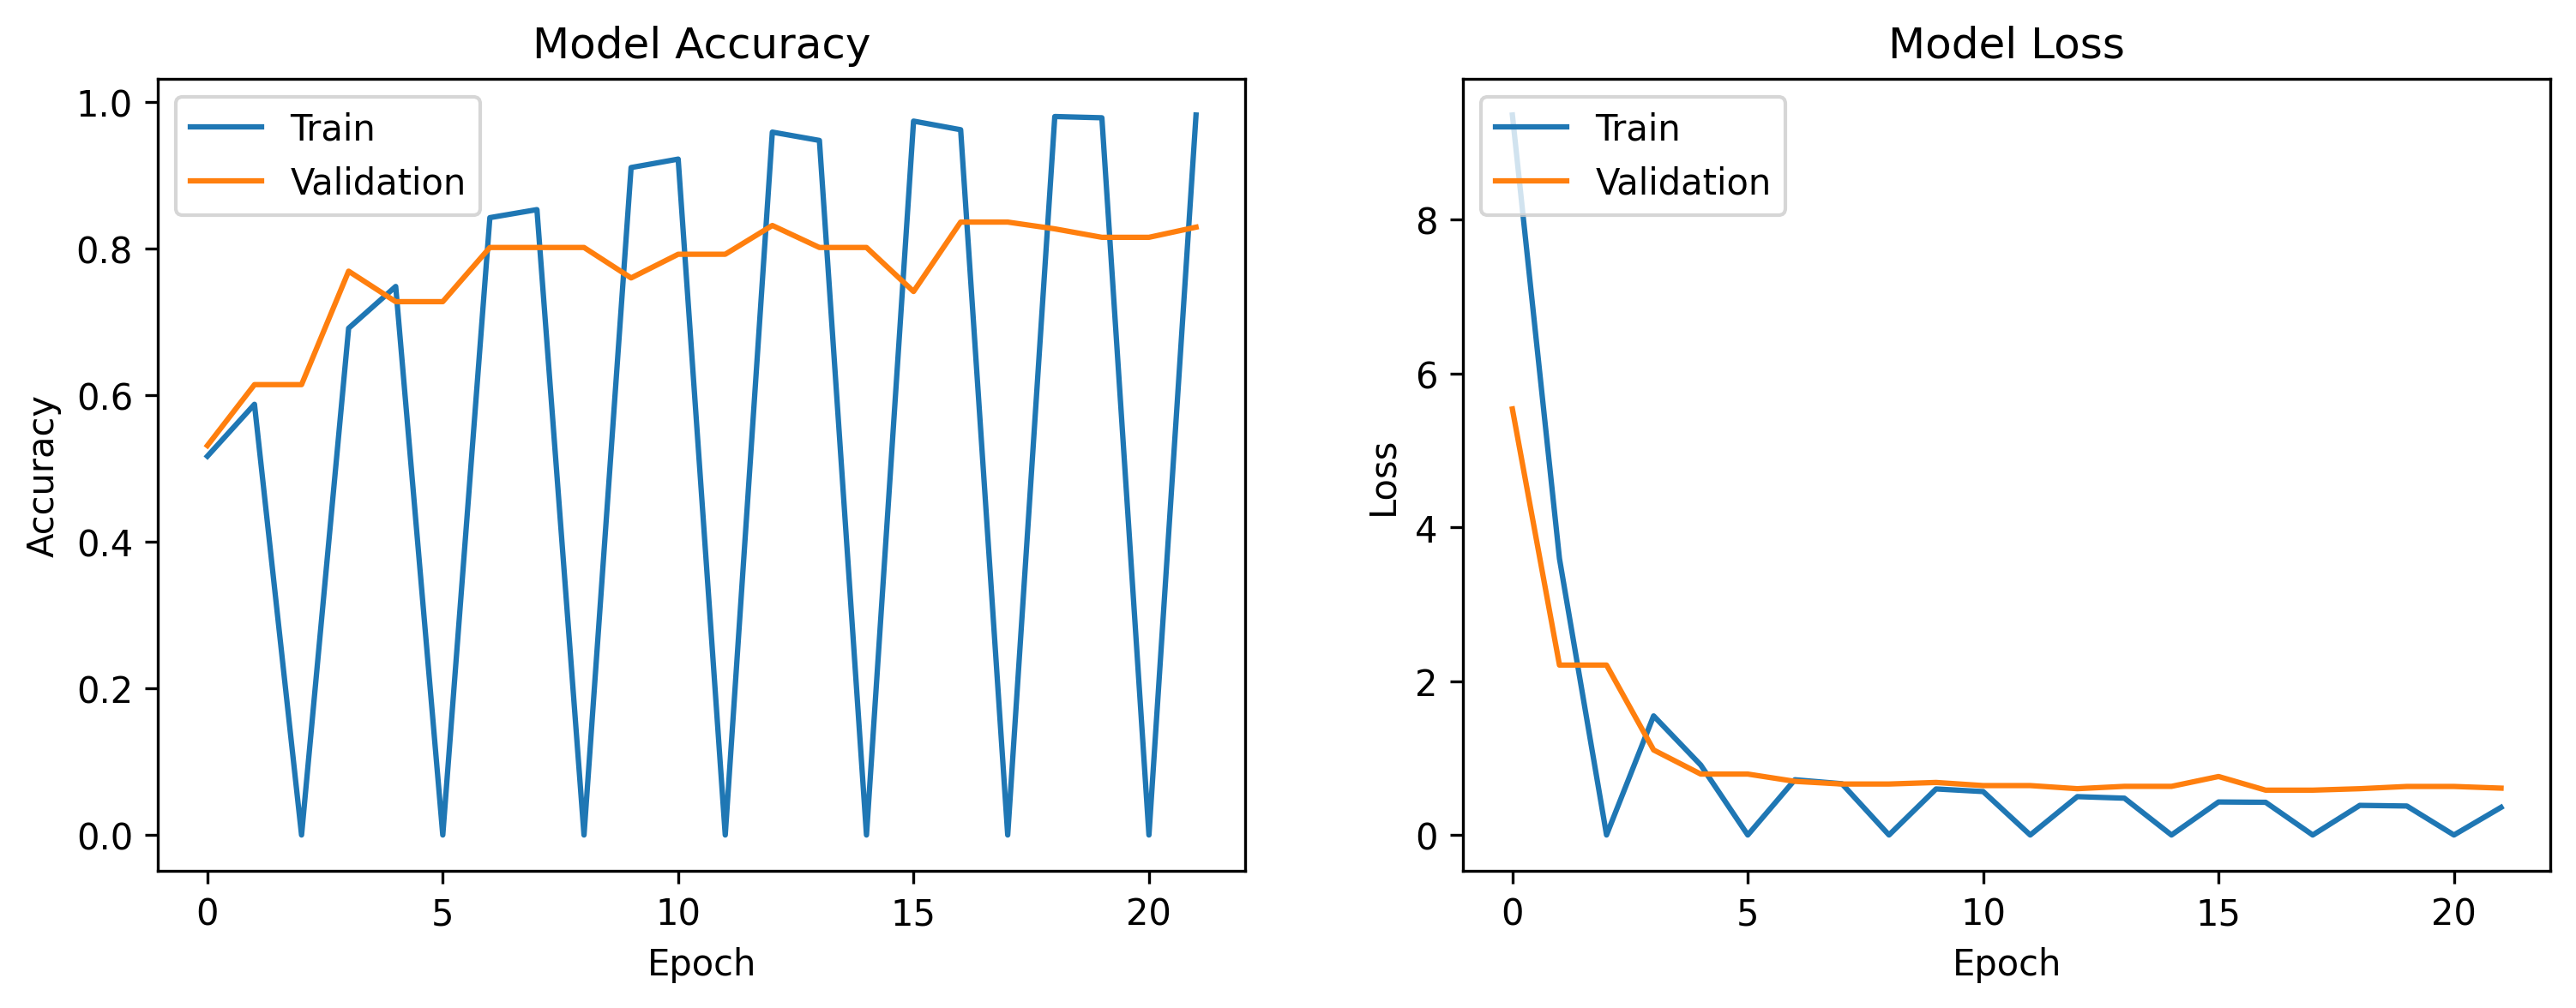

In [1036]:
# Plot the history of the best model
plt.figure(figsize=(12, 4), dpi=300)
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [1037]:
pred_train = model.predict(X)
pred_test = model.predict(X_test)
pred_pv = model.predict(X_test_pv)

pred_train_binary = np.argmax(pred_train, axis=1)
pred_test_binary = np.argmax(pred_test, axis=1)
pred_pv_binary = np.argmax(pred_pv, axis=1)

150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step


In [1038]:
pred_train = pred_train[:, 1]
pred_test = pred_test[:, 1]
pred_pv = pred_pv[:, 1]

In [1039]:
display(y_test)
display(pred_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,

array([0.8552724 , 0.12603709, 0.12200231, 0.50164336, 0.12167769,
       0.7011794 , 0.1213882 , 0.12143246, 0.12216613, 0.1239523 ,
       0.6621748 , 0.12155925, 0.12293535, 0.12234747, 0.23617418,
       0.12261454, 0.66424453, 0.84137785, 0.12580304, 0.12149141,
       0.12215544, 0.1360385 , 0.12329415, 0.15602721, 0.8542595 ,
       0.8554358 , 0.16492829, 0.7505337 , 0.12190086, 0.1873542 ,
       0.12312423, 0.8529859 , 0.8447826 , 0.8542851 , 0.12187956,
       0.1241147 , 0.83306867, 0.7923139 , 0.12158248, 0.12179563,
       0.12166298, 0.1286577 , 0.12202324, 0.14866522, 0.12388829,
       0.12669204, 0.7903365 , 0.12343543, 0.8544328 , 0.12153885,
       0.13173299, 0.12235449, 0.13400012, 0.1385629 , 0.12488157,
       0.13651104, 0.856089  , 0.12248855, 0.12131479, 0.12426823,
       0.12608853, 0.2765938 , 0.12290724, 0.12170221, 0.85320157,
       0.856569  , 0.84832364, 0.8486756 , 0.8553551 , 0.1410691 ,
       0.1228452 , 0.8554    , 0.8523607 , 0.12185914, 0.12156

In [1040]:
print('Results Transformer:')
print(classification_report(y_test, pred_test_binary))
print('#'*30)
print('Results Transformer Podemos-Vox:')
print(classification_report(y_test_pv, pred_pv_binary))

Results Transformer:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       232
           1       0.82      0.82      0.82       201

    accuracy                           0.84       433
   macro avg       0.84      0.84      0.84       433
weighted avg       0.84      0.84      0.84       433

##############################
Results Transformer Podemos-Vox:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1034
           1       0.86      0.80      0.83       916

    accuracy                           0.85      1950
   macro avg       0.85      0.84      0.85      1950
weighted avg       0.85      0.85      0.85      1950



Confusion Matrix Transformer:


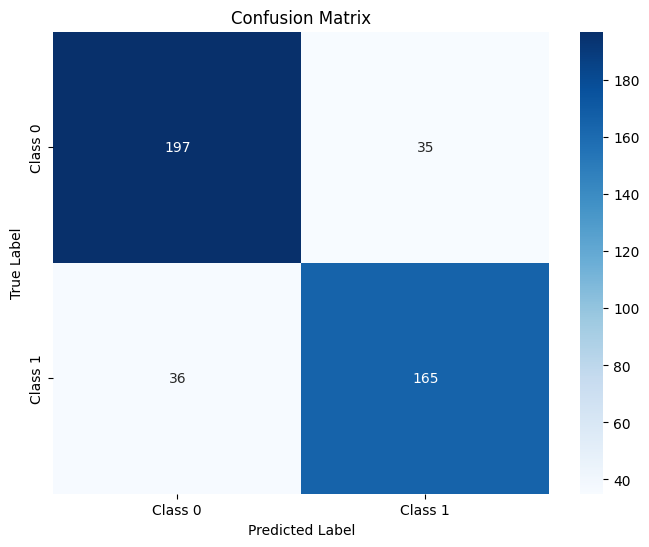

##############################
Confusion Matrix Transformer Podemos-Vox:


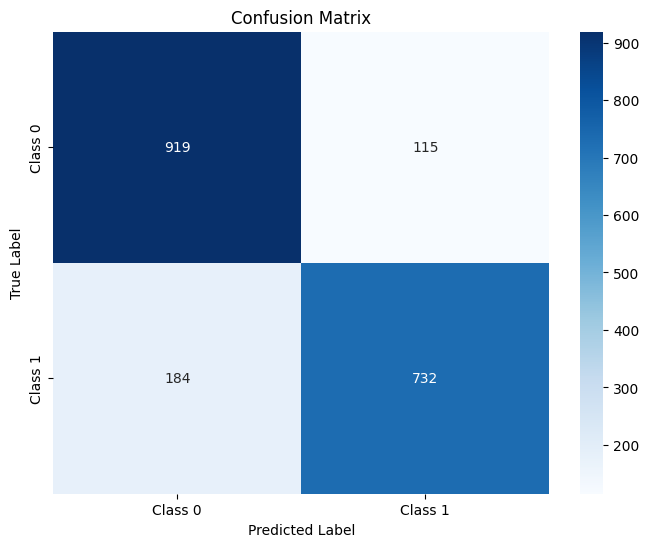

In [1041]:
print('Confusion Matrix Transformer:')
show_confusion_matrix(y_test, pred_test_binary)
print('#'*30)
print('Confusion Matrix Transformer Podemos-Vox:')
show_confusion_matrix(y_test_pv, pred_pv_binary)

ROC AUC curve Transformer Argmax:
####################
ROC AUC curve Transformer:
####################
ROC AUC score Transformer Argmax Podemos-Vox:
####################
ROC AUC score Transformer Podemos-Vox:


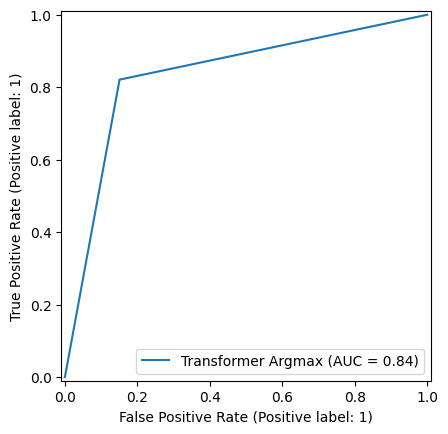

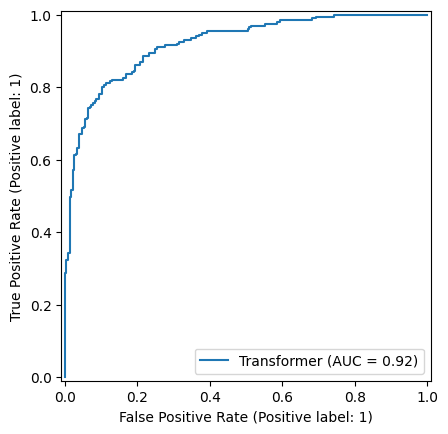

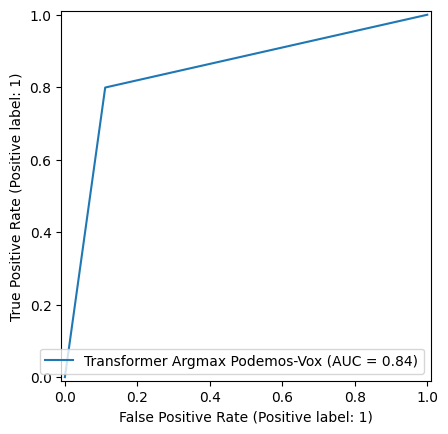

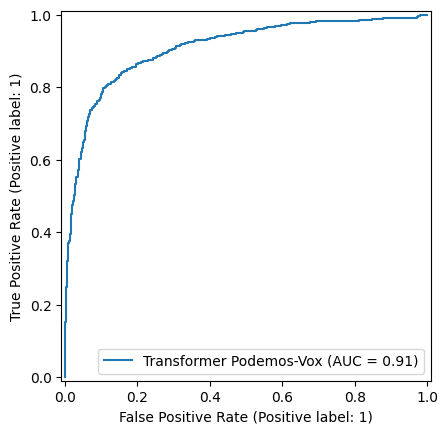

In [1042]:
print('ROC AUC curve Transformer Argmax:')
RocCurveDisplay.from_predictions(y_test, pred_test_binary, name='Transformer Argmax')
print('#'*20)
print('ROC AUC curve Transformer:')
RocCurveDisplay.from_predictions(y_test, pred_test, name='Transformer')
print('#'*20)
print('ROC AUC score Transformer Argmax Podemos-Vox:')
RocCurveDisplay.from_predictions(y_test_pv, pred_pv_binary, name='Transformer Argmax Podemos-Vox')
print('#'*20)
print('ROC AUC score Transformer Podemos-Vox:')
RocCurveDisplay.from_predictions(y_test_pv, pred_pv, name='Transformer Podemos-Vox')

In [1043]:
pred_data = pd.DataFrame({'true': y_test, 'pred': pred_test, 'gender': test_df['speaker_gender'], 'term': test_df['term']})
pred_data_pv = pd.DataFrame({'true': y_test_pv, 'pred': pred_pv, 'gender': data_pv['speaker_gender'], 'term': data_pv['term']})

In [1044]:
display(pred_data)

,true,pred,gender,term
11,1,0.855272,1,4
25,0,0.126037,0,4
26,0,0.122002,0,4
28,0,0.501643,0,4
31,0,0.121678,0,4
...,...,...,...,...
11872,1,0.175294,1,2
11892,0,0.141801,1,2
11893,0,0.503238,1,2
11896,0,0.846245,1,2


In [1045]:
male_pred = pred_data[pred_data['gender'] == 1]
fem_pred = pred_data[pred_data['gender'] == 0]

In [1046]:
pred_data['term'].value_counts()

term
4    244
2    121
0     55
3      8
1      5
Name: count, dtype: int64

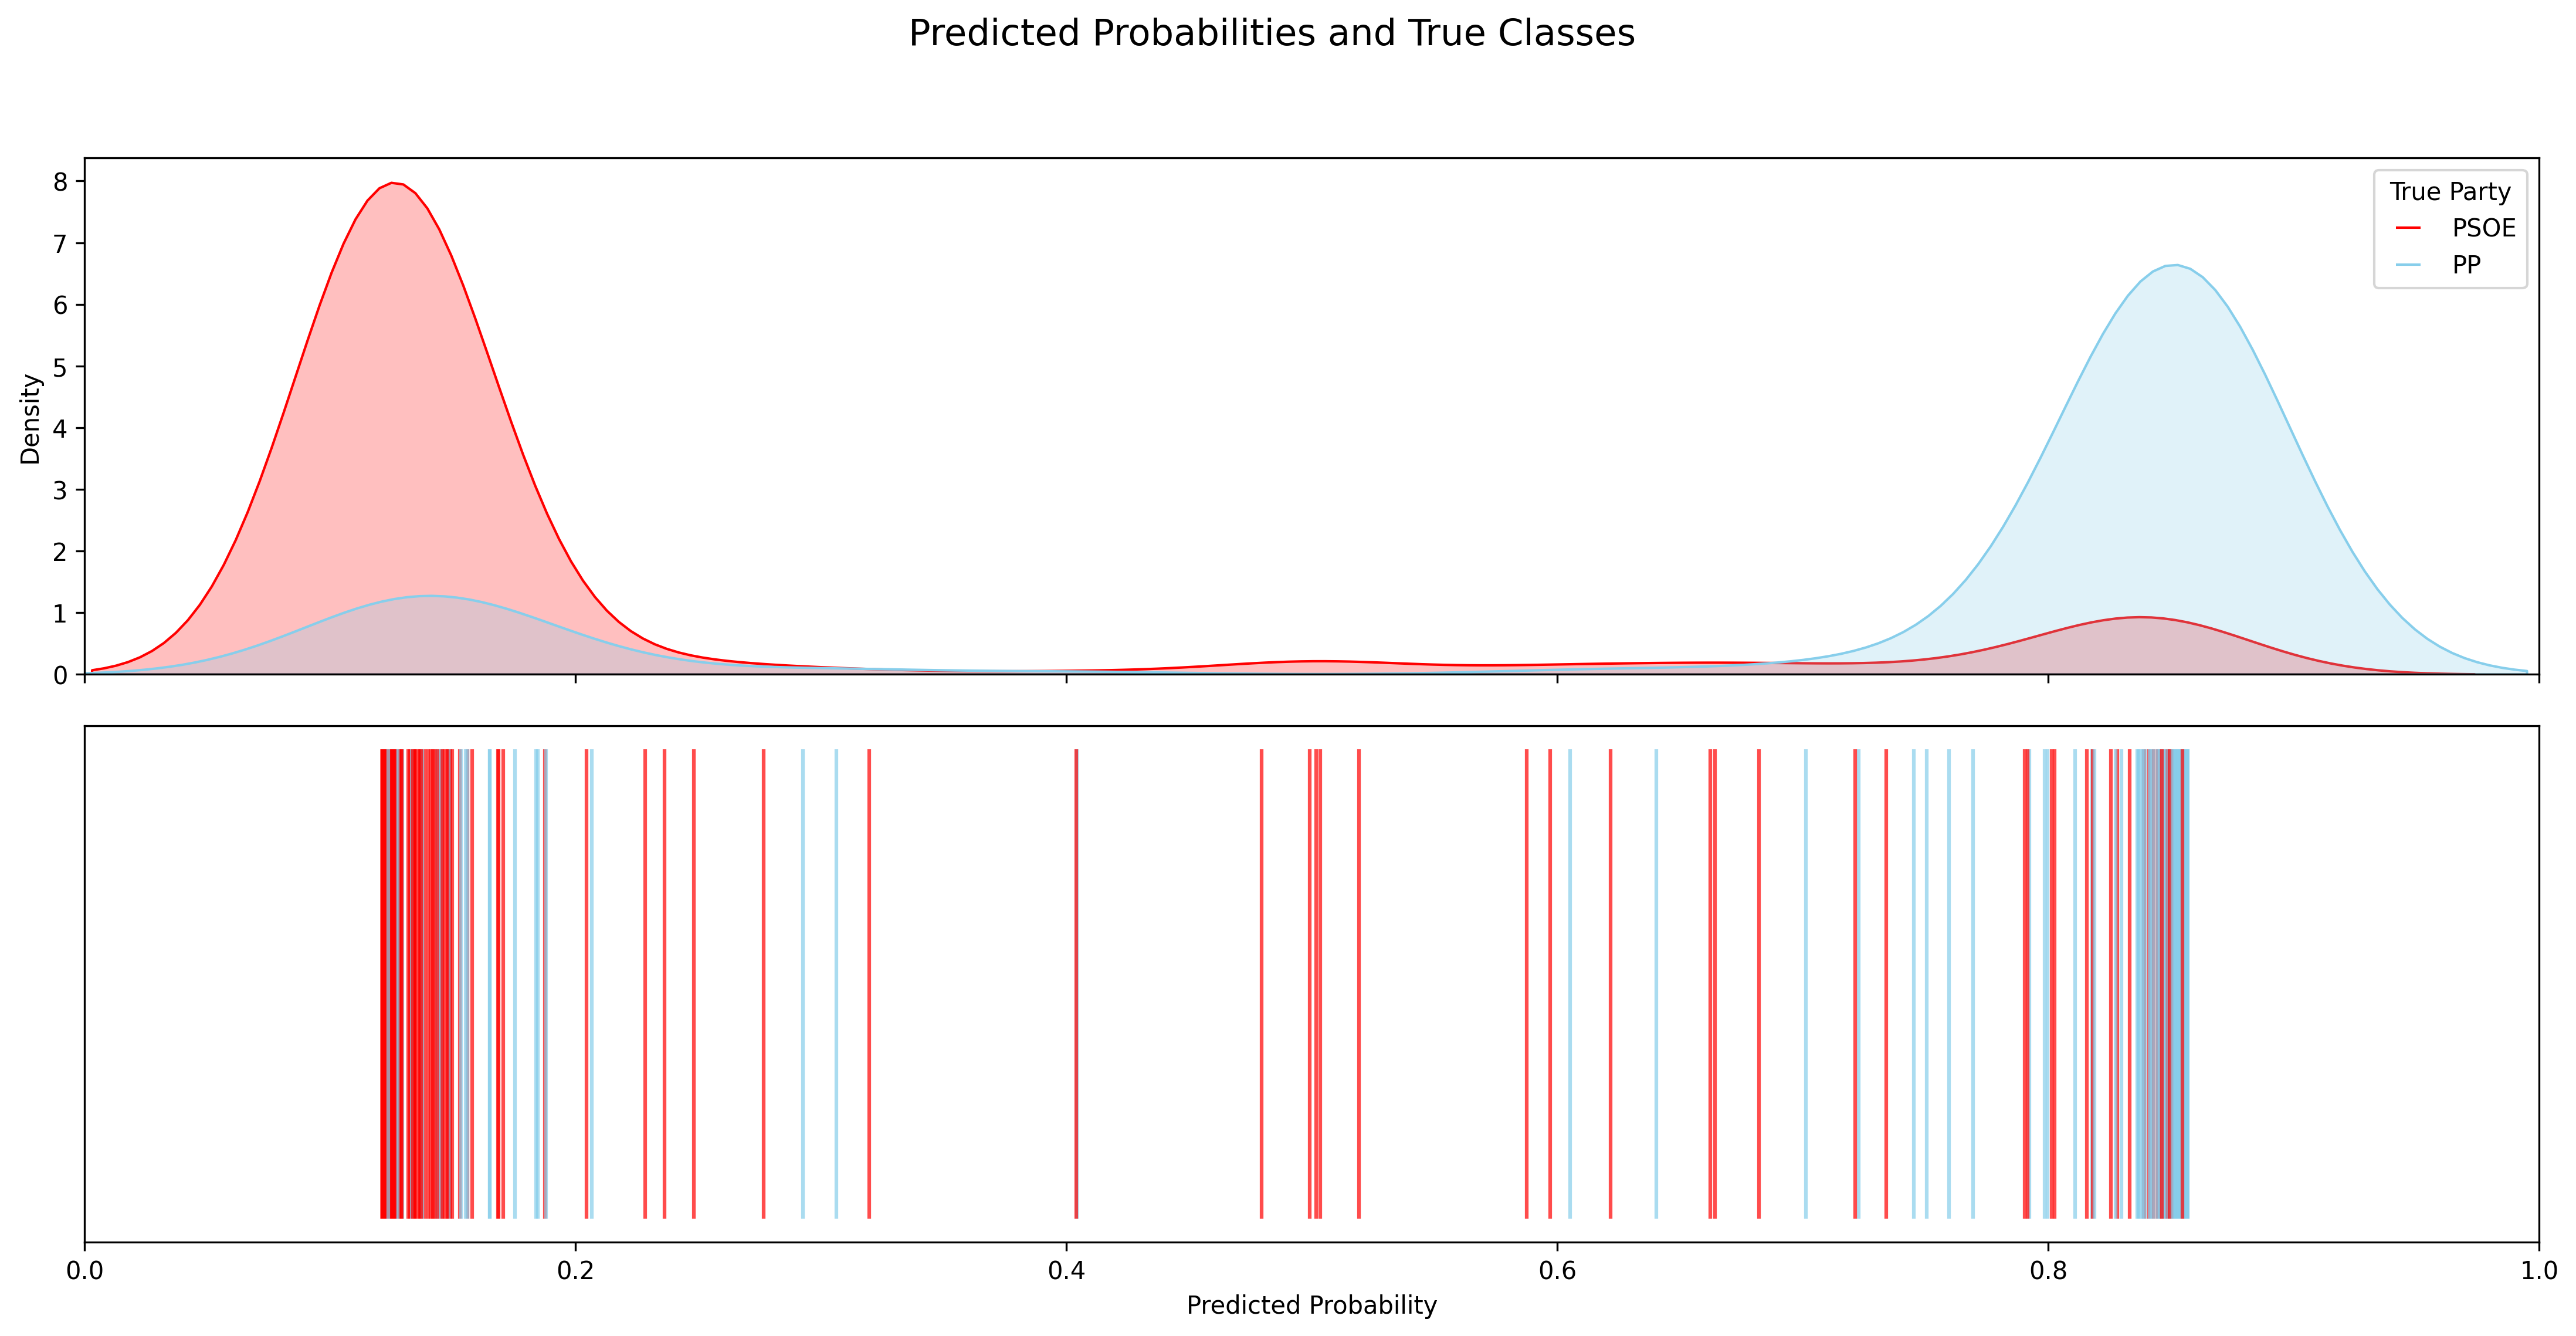

In [1047]:
cool_party_plot(pred_data, 'red', 'skyblue', 'PSOE', 'PP')

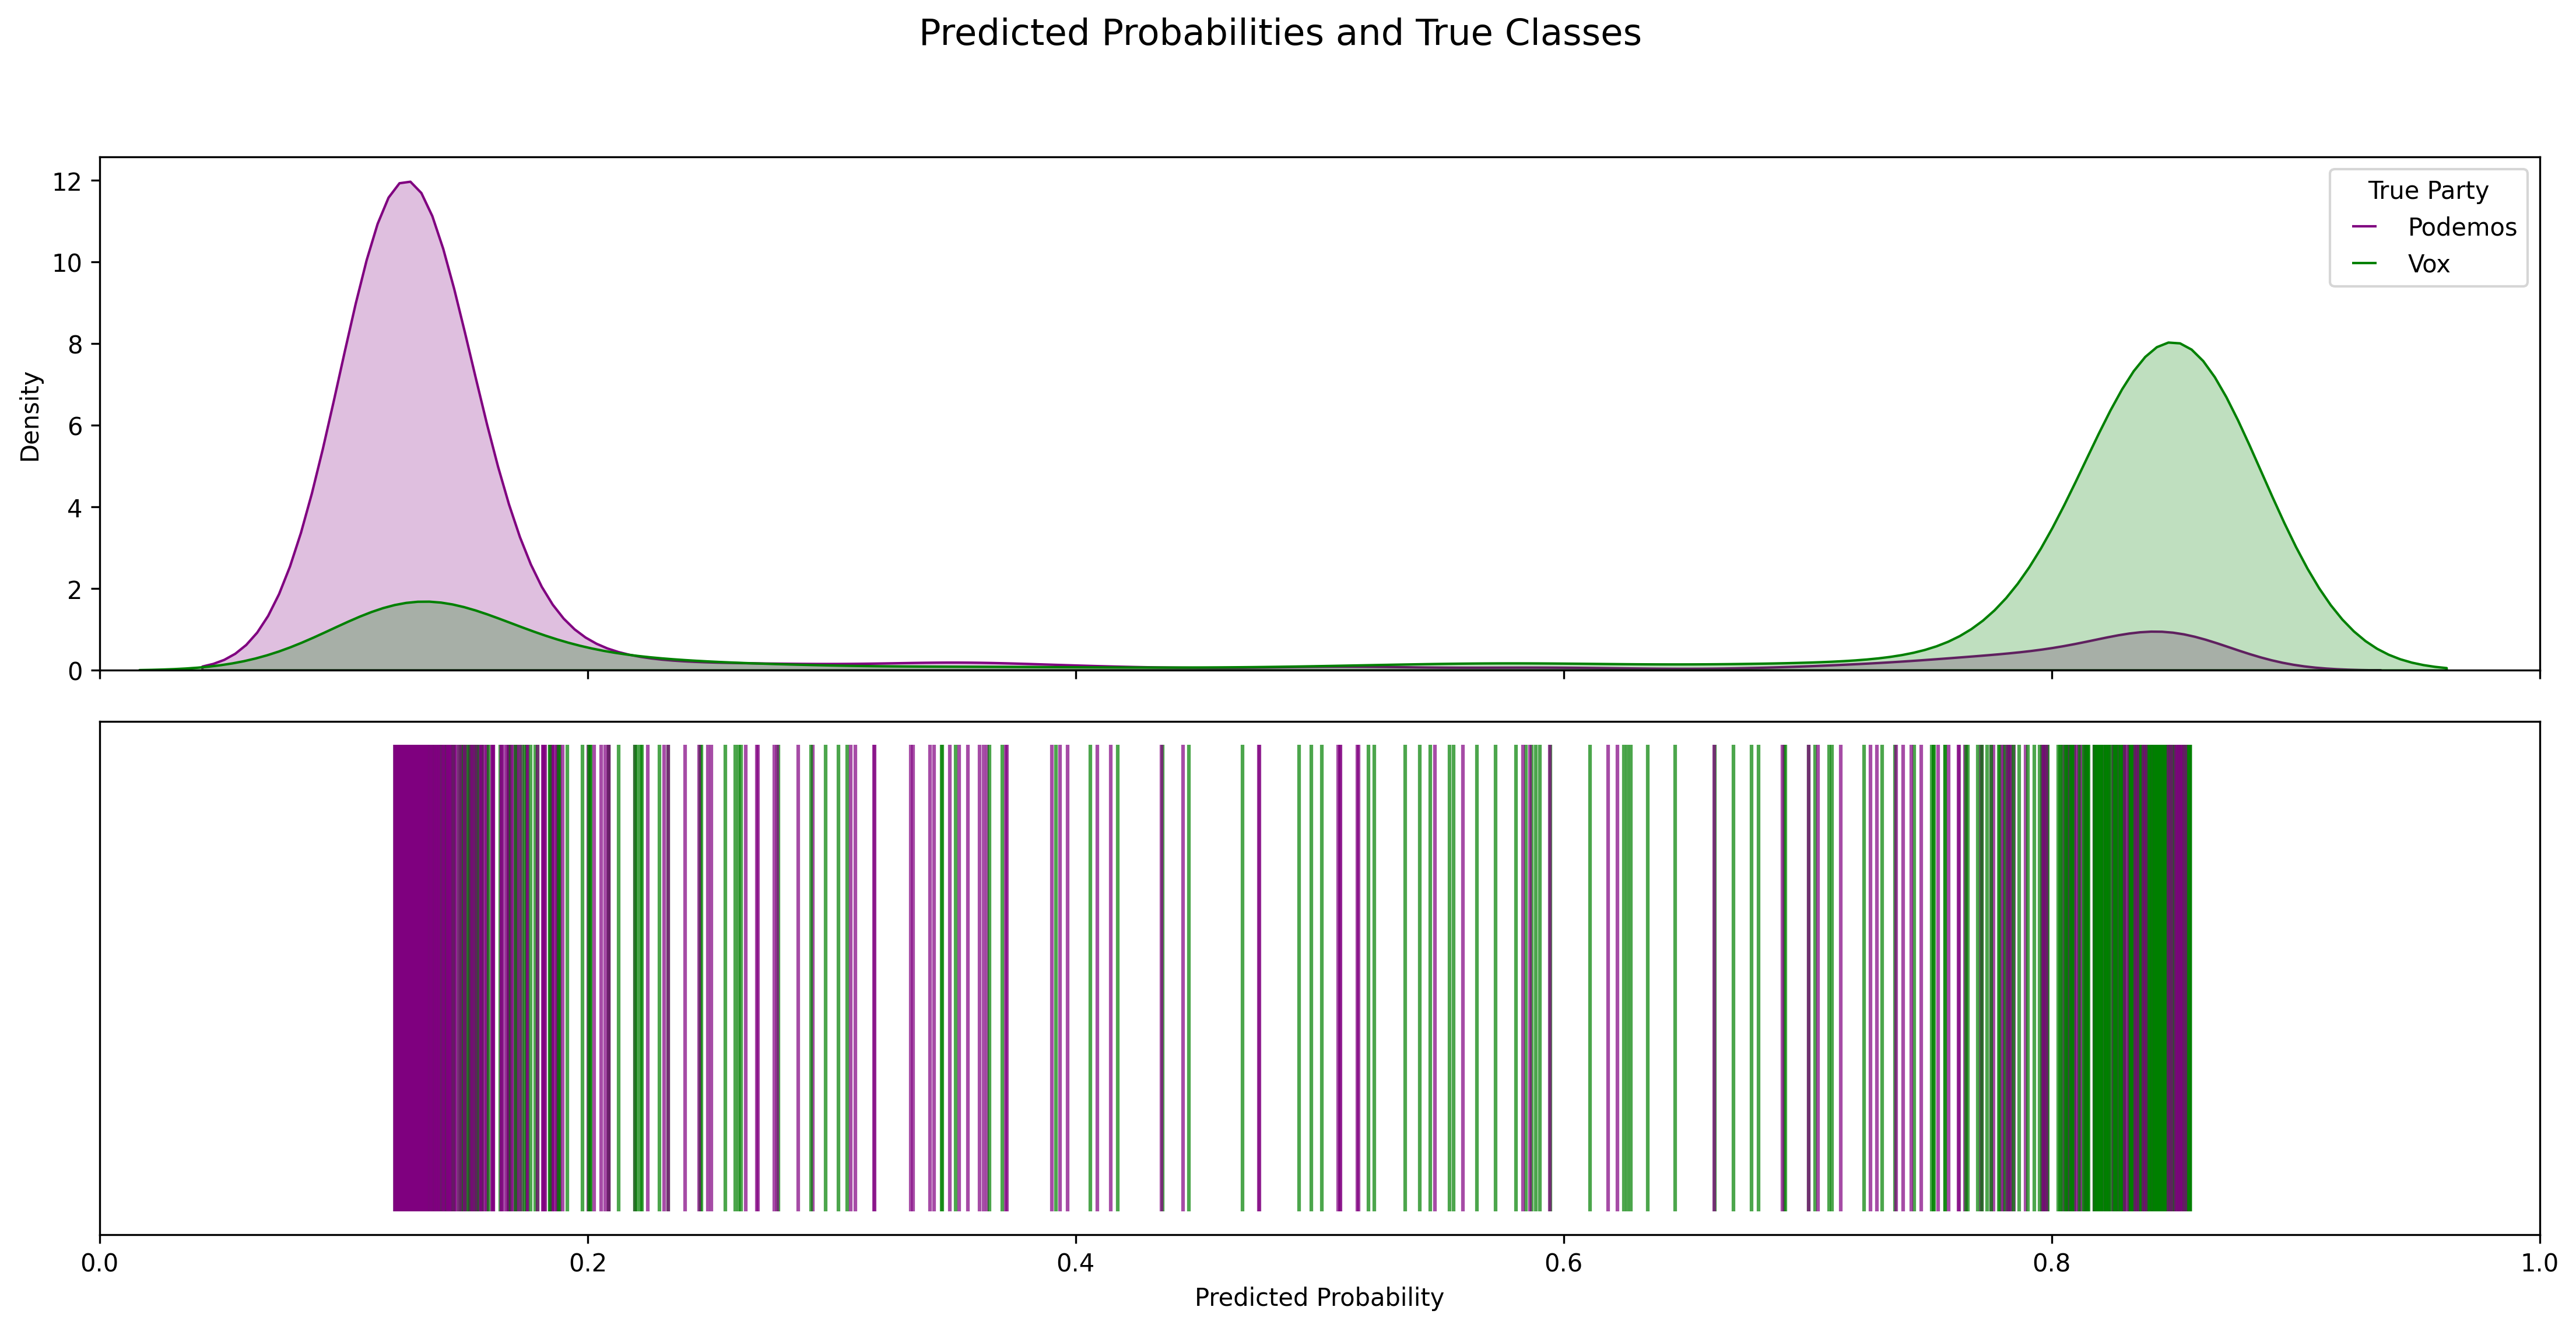

In [1048]:
cool_party_plot(pred_data_pv, 'purple', 'green', 'Podemos', 'Vox')